🎯 Model Accuracy: 95.00%
❌ Error Rate: 5.00%

📊 Classification Report:
               precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        18
  Black gram       0.95      1.00      0.98        20
    Chickpea       1.00      1.00      1.00        19
     Coconut       1.00      1.00      1.00        19
      Coffee       0.76      1.00      0.86        22
      Cotton       1.00      1.00      1.00        13
  Ground Nut       0.90      1.00      0.95        19
        Jute       0.82      1.00      0.90        18
Kidney Beans       1.00      1.00      1.00        15
      Lentil       1.00      1.00      1.00        18
  Moth Beans       1.00      0.93      0.97        15
   Mung Bean       1.00      1.00      1.00        22
        Peas       1.00      1.00      1.00        20
 Pigeon Peas       1.00      0.89      0.94        18
      Rubber       1.00      0.96      0.98        25
   Sugarcane       1.00      0.89      0.94        18
         

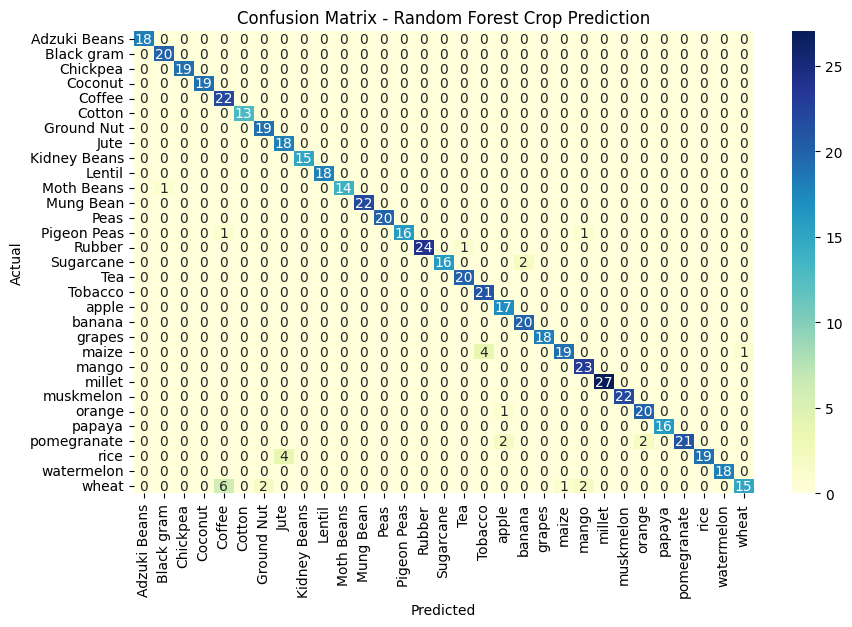

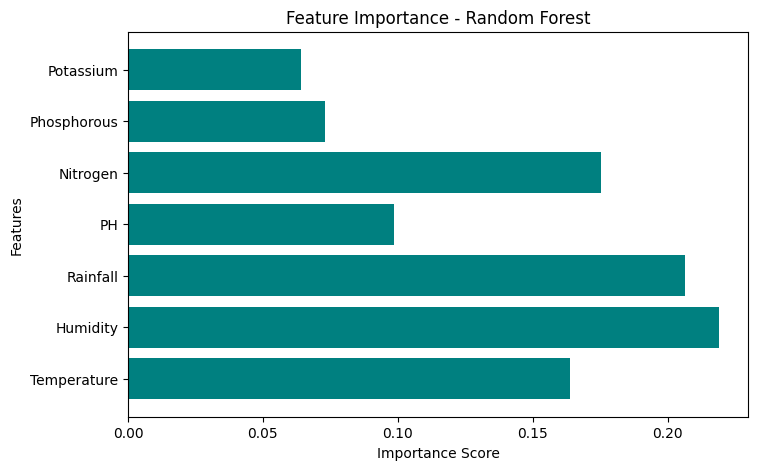

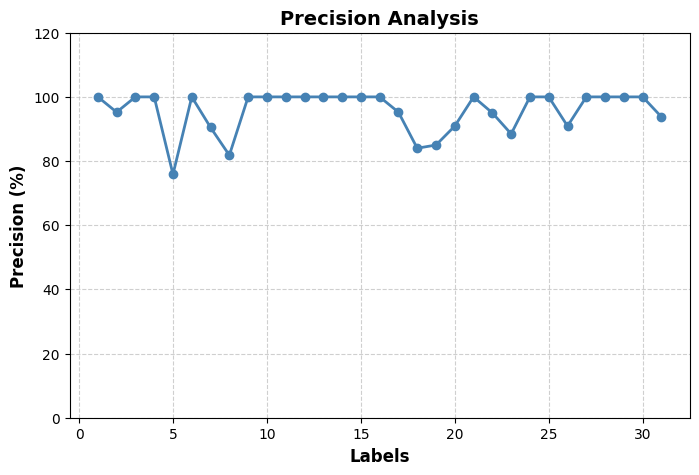

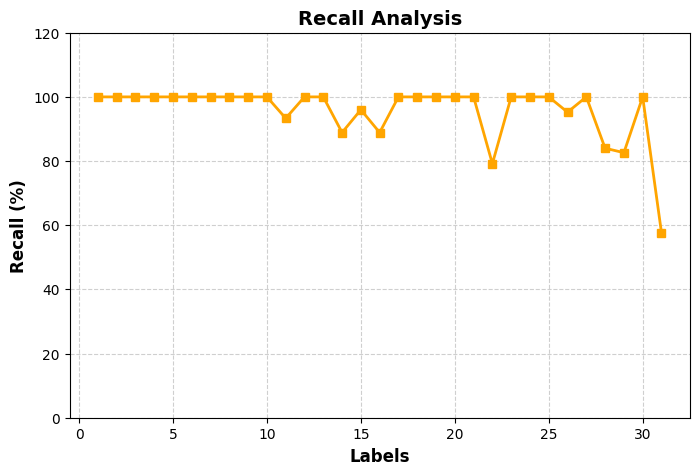

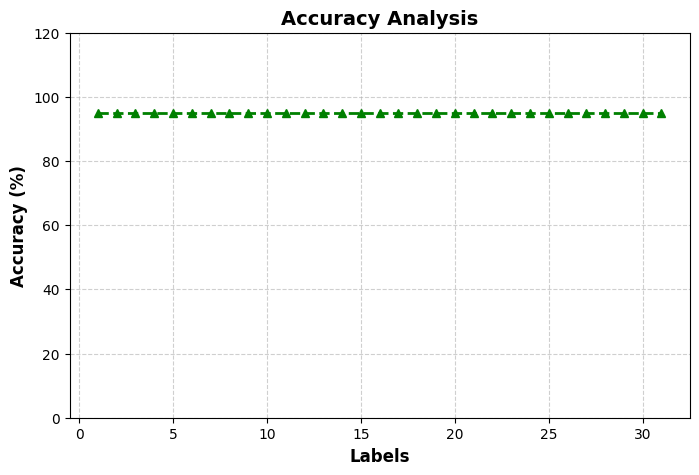

✅ Overall Accuracy of Model: 95.00%

--- 🌿 Enter Soil and Climate Details ---


Enter Temperature:  25
Enter Humidity:  50
Enter Rainfall:  220
Enter PH:  7
Enter Nitrogen:  90
Enter Phosphorous:  90
Enter Potassium:  90



✅ Recommended Crop: Rubber


In [3]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load dataset
data = pd.read_csv("Dataset 1.csv")

# 2️⃣ Split features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# 3️⃣ Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# 4️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Build and train the model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)

# 6️⃣ Predictions
y_pred = model.predict(X_test)

# 7️⃣ Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy

print(f"🎯 Model Accuracy: {accuracy*100:.2f}%")
print(f"❌ Error Rate: {error_rate*100:.2f}%\n")
print("📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# 8️⃣ Confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Random Forest Crop Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9️⃣ Feature Importance
plt.figure(figsize=(8,5))
plt.barh(X.columns, model.feature_importances_, color='teal')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# 8️⃣ Get classification metrics
report = classification_report(y_test, y_pred, output_dict=True)
labels = range(1, len(le.classes_) + 1)

# Extract per-class metrics
precision = [report[str(i)]['precision'] * 100 for i in range(len(le.classes_))]
recall = [report[str(i)]['recall'] * 100 for i in range(len(le.classes_))]
accuracy_value = accuracy_score(y_test, y_pred) * 100
accuracy = [accuracy_value] * len(le.classes_)

# Get crop names for x-axis
crop_names = le.classes_

# 9️⃣ Plot Precision Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, precision, marker='o', color='steelblue', linewidth=2)
plt.title("Precision Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Precision (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
# 🔟 Plot Recall Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, recall, marker='s', color='orange', linewidth=2)
plt.title("Recall Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Recall (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 1️⃣1️⃣ Plot Accuracy Analysis
plt.figure(figsize=(8, 5))
plt.plot(labels, accuracy, linestyle='--', color='green', linewidth=2, marker='^')
plt.title("Accuracy Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Labels", fontsize=12, fontweight='bold')
plt.ylabel("Accuracy (%)", fontsize=12, fontweight='bold')
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"✅ Overall Accuracy of Model: {accuracy_value:.2f}%")


# 12🌱 User Input Prediction
print("\n--- 🌿 Enter Soil and Climate Details ---")
user_input = []
for col in X.columns:
    value = float(input(f"Enter {col}: "))
    user_input.append(value)

# Convert to DataFrame
user_df = pd.DataFrame([user_input], columns=X.columns)

# Predict crop
predicted_crop = le.inverse_transform(model.predict(user_df).astype(int))[0]
print("\n✅ Recommended Crop:", predicted_crop)
